<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Sentiment Analysis of Amazon Fine Food Reviews</h2> 
<br>

<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> Data collection</h2>

### Amazon Fine Food Reviews
#### Source : https://www.kaggle.com/snap/amazon-fine-food-reviews


<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data Preparocessing](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Model Training](#3)
   #### [4. Vectorization](#4)
   #### [5. Model Evaluation](#5)
   #### [6. Deployment](#6)

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">1. Data Preparation</h2>

In [3]:
df = pd.read_csv('../data/Reviews.csv')

In [4]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
df.sample(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
90879,90880,B000FBM3PO,A28WBCAWHZXTR9,Barbara Hillier,1,1,5,1255564800,Memories of Germany,Having grown up on these cookies I was pleased...
9651,9652,B001LXYA5Q,A3NRI97XEKEXJH,M. Russell,38,41,3,1239494400,"Neat, but not ""wowwie!""",After reading reviews and testing these out wi...


In [6]:
df.shape

(568454, 10)

In [7]:
# Check null values
df.isna().sum().to_frame(name='missing values')

,missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


Drop null values

In [8]:
total_rows = df.shape[0]
df.dropna(how='any',inplace=True)
remaining_rows = df.shape[0]

removed_rows = total_rows-remaining_rows
print('No. of rows removed :', removed_rows)

No. of rows removed : 53


In [9]:
print(f"\nPercentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
print(f"Percentage of data reamining:{np.round((remaining_rows/total_rows)*100,2)}")


Percentage of data removed:0.01%
Percentage of data reamining:99.99


Remove duplicate rows

In [10]:
a =  df.shape[0]
df.drop_duplicates(inplace=True, subset=['Score','Text'])
b = df.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No. of rows removed : 174745

Percentage of data removed: 30.74%
Percentage of data remaining: 69.25%


Remove outliers

In [11]:
a =  df.shape[0]

idx = df[df["HelpfulnessNumerator"]>df["HelpfulnessDenominator"]].index
df.drop(index=idx, inplace=True)

b = df.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed:{np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((b/total_rows)*100,2)}%")

No. of rows removed : 2

Percentage of data removed:0.0%
Percentage of data remaining:69.25%


Create target column using Score

In [12]:
## `Score` > 3 : "Positive" 
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):
    return "Positive" if x>3 else "Negative" if x<3 else "Neutral"

df.loc[:, 'target'] = df.Score.apply(create_target)

In [13]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [14]:
df[['Score','target']].sample(15)

,Score,target
40744,5,Positive
111610,4,Positive
258749,5,Positive
138606,5,Positive
89467,4,Positive
428279,4,Positive
535516,5,Positive
45202,5,Positive
89074,5,Positive
429320,5,Positive


<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">2. Explory Data Analysis</h2>

In [15]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive


In [16]:
df = df.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'])

In [17]:
df.head(2)

,Text,target
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [18]:
df['target'].value_counts()

target
Positive    306805
Negative     57079
Neutral      29770
Name: count, dtype: int64

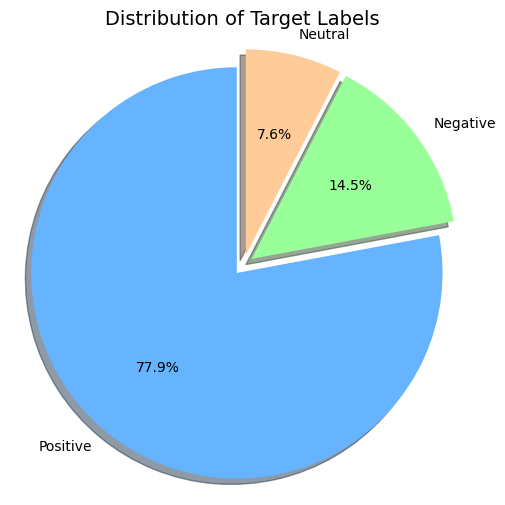

In [19]:
# Generate the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    df['target'].value_counts(),  # Values to plot
    labels=['Positive', 'Negative', 'Neutral'],  # Labels for each slice
    colors=['#66b3ff', '#99ff99', '#ffcc99'],  # Custom colors for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow for a 3D effect
    explode=(0.05, 0.05, 0.05)  # Slightly separate each slice for emphasis
)

plt.title('Distribution of Target Labels', fontsize=14)  # Add a title
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
plt.show()

Down sampling (remove some positive and negative reviews)

In [20]:
neutral = df.loc[df.target=="Neutral"] # 29770 reviews

positive = df.loc[df.target=="Positive"].sample(50000)

negative = df.loc[df.target=="Negative"].sample(50000)

In [21]:
df = pd.concat([positive, negative, neutral])

In [22]:
df.shape

(129770, 2)

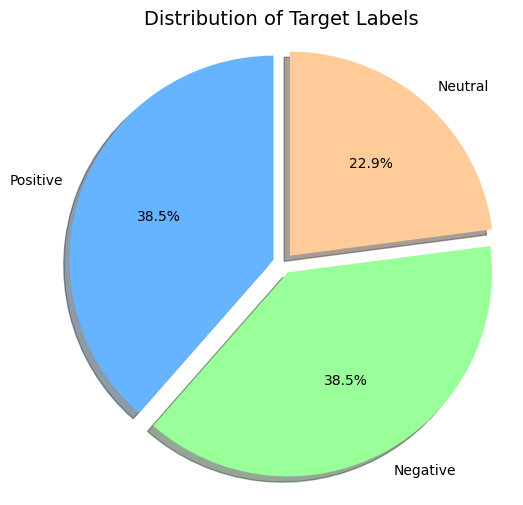

In [23]:
# Generate the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    df['target'].value_counts(),  # Values to plot
    labels=['Positive', 'Negative', 'Neutral'],  # Labels for each slice
    colors=['#66b3ff', '#99ff99', '#ffcc99'],  # Custom colors for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow for a 3D effect
    explode=(0.05, 0.05, 0.05)  # Slightly separate each slice for emphasis
)

plt.title('Distribution of Target Labels', fontsize=14)  # Add a title
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
plt.show()

In [24]:
df['num_characters'] = df['Text'].apply(len)

In [25]:
df['num_characters']

284134    1248
557848     352
397325      76
461819     320
53444      142
          ... 
568336     137
568355     227
568369     663
568379     259
568422     391
Name: num_characters, Length: 129770, dtype: int64

In [26]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df['num_words']

284134    273
557848     82
397325     18
461819     71
53444      31
         ... 
568336     30
568355     50
568369    138
568379     56
568422     88
Name: num_words, Length: 129770, dtype: int64

In [28]:
df.head(3)

,Text,target,num_characters,num_words
284134,I don't use a lot of commercial baby foods as ...,Positive,1248,273
557848,"Easy recipe on the package, just add 1 pound b...",Positive,352,82
397325,This fruit basket was a gift to a friend who t...,Positive,76,18


In [29]:
df.shape

(129770, 4)

In [30]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df['num_sentences']

284134     9
557848     4
397325     1
461819     3
53444      2
          ..
568336     3
568355     4
568369    11
568379     3
568422     5
Name: num_sentences, Length: 129770, dtype: int64

In [32]:
df.head(2)

,Text,target,num_characters,num_words,num_sentences
284134,I don't use a lot of commercial baby foods as ...,Positive,1248,273,9
557848,"Easy recipe on the package, just add 1 pound b...",Positive,352,82,4


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,129770.000000,129770.000000,129770.000000
mean,459.826994,101.427133,5.136796
std,449.814821,100.350819,3.906865
min,12.000000,3.000000,1.000000
25%,194.000000,42.000000,3.000000
50%,328.000000,72.000000,4.000000
75%,562.000000,124.000000,6.000000
max,21409.000000,4145.000000,346.000000


In [34]:
df['target'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [35]:
# Positive
df[df['target'] == 'Positive'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,414.836560,91.492680,4.861960
std,413.330997,92.602624,3.582452
min,18.000000,3.000000,1.000000
25%,175.000000,38.000000,3.000000
50%,290.000000,63.000000,4.000000
75%,500.000000,110.000000,6.000000
max,10112.000000,2066.000000,95.000000


In [36]:
# Negative
df[df['target'] == 'Negative'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,466.297480,102.426840,5.287260
std,447.141173,99.343607,4.129436
min,12.000000,3.000000,1.000000
25%,204.000000,45.000000,3.000000
50%,342.000000,74.000000,4.000000
75%,568.000000,124.000000,7.000000
max,11861.000000,2808.000000,346.000000


In [37]:
# Neutral
df[df['target'] == 'Neutral'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,29770.000000,29770.000000,29770.000000
mean,524.522909,116.433423,5.345684
std,501.607437,111.924806,4.016550
min,32.000000,8.000000,1.000000
25%,217.000000,48.000000,3.000000
50%,376.000000,83.000000,4.000000
75%,659.000000,146.000000,7.000000
max,21409.000000,4145.000000,104.000000


<Axes: xlabel='num_characters', ylabel='Count'>

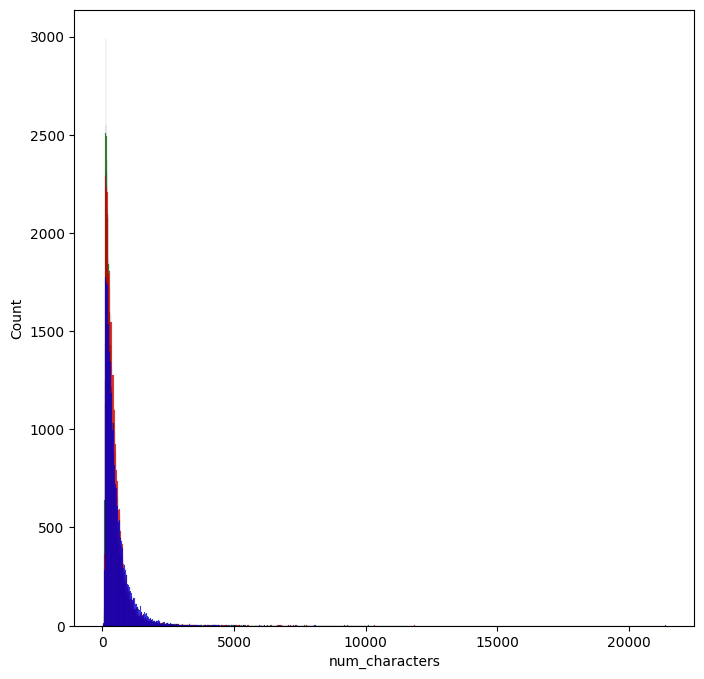

In [38]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_characters'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_characters'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_characters'],color='blue')

<Axes: xlabel='num_words', ylabel='Count'>

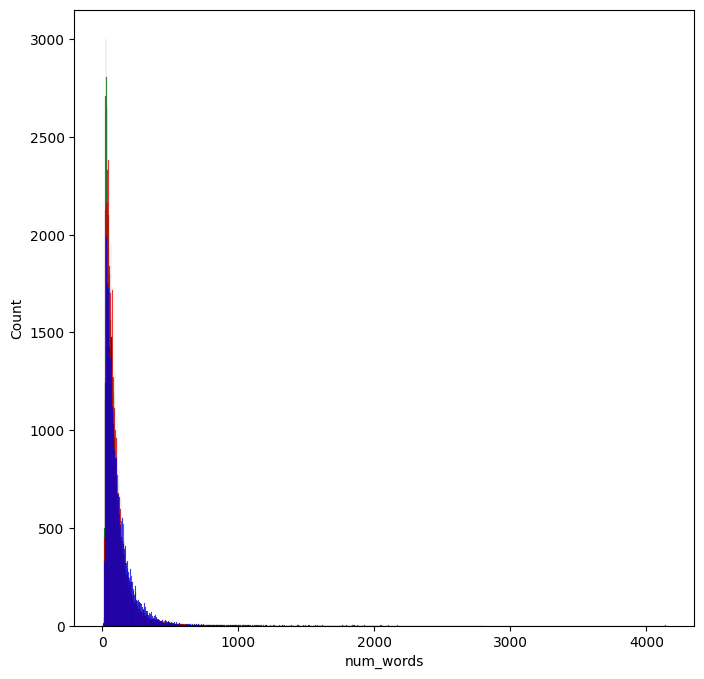

In [39]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_words'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_words'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_words'],color='blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

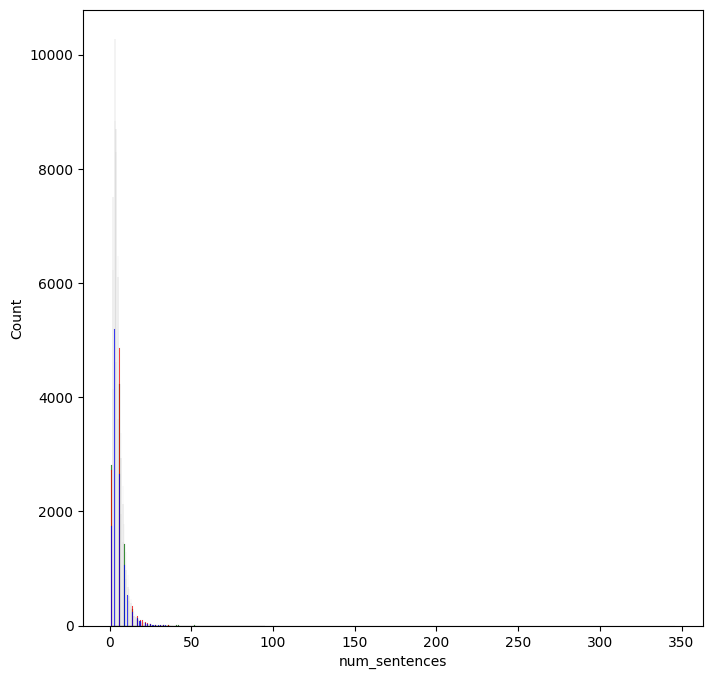

In [40]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_sentences'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_sentences'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_sentences'],color='blue')

In [41]:
# sns.pairplot(df,hue='target')

In [42]:
df['target'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

Word cloud for Positive reviews

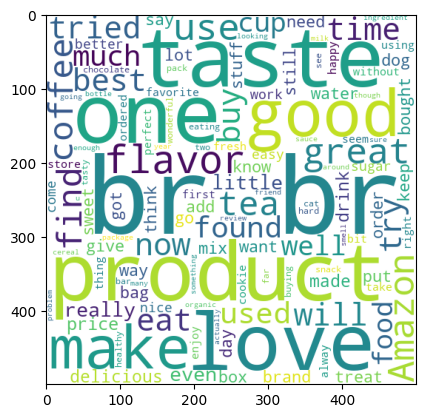

In [43]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

positive = wc.generate(df[df['target'] == 'Positive']['Text'].str.cat(sep=' '))

plt.imshow(positive)

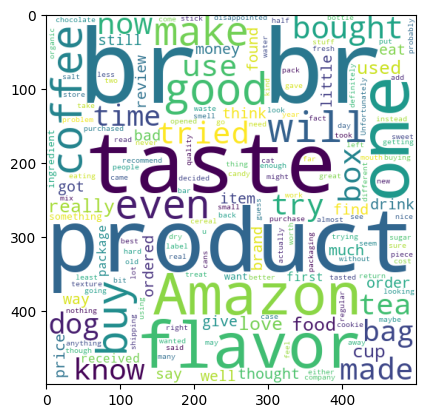

In [44]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Negative = wc.generate(df[df['target'] == 'Negative']['Text'].str.cat(sep=' '))

plt.imshow(Negative)

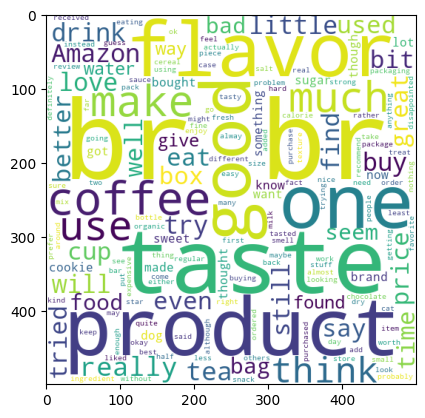

In [45]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Neutral = wc.generate(df[df['target'] == 'Neutral']['Text'].str.cat(sep=' '))

plt.imshow(Neutral)

In [46]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{'but', 's', 'are', 'the', 'ours', 'this', 'doesn', 't', "you've", 'when', 'why', 'what', 'being', 'while', 'how', 'his', "it's", 'from', 'o', 'above', 'me', 'any', 'aren', 're', 'off', 'an', 'd', 'too', 'in', 'whom', 'is', 'did', 'here', 'he', 'their', 'between', 'some', 'or', 'will', 'once', 'your', 'they', 'of', "she's", 'other', 'by', 'these', 'just', 'shouldn', 'one', 'she', 'and', 'until', 'doing', 'yours', 'didn', 'i', 'before', 'below', 'haven', 'through', 'so', 'll', 'shan', "should've", 'both', 'over', 'with', 'theirs', 'y', 'after', 'you', 've', 'about', 'then', 'down', 'we', 'be', 'itself', 'out', 'won', 'ain', 'those', 'him', 'wouldn', 'because', 'against', 'its', 'that', 'own', 'if', 'up', 'on', 'themselves', "that'll", 'them', 'there', 'most', 'myself', 'which', 'during', 'yourself', 'couldn', 'needn', 'm', 'ma', 'again', 'into', 'has', 'as', 'ourselves', 'yourselves', 'have', 'mustn', "you'll", 'hers', 'does', 'at', 'our', 'it', 'few', 'more', 'a', 'had', 'same', 'my', 

Remove unwanted words from reviews

Ex. html tags, punctuation, stop words, etc..

In [47]:
stemmer = PorterStemmer()

In [48]:
HTMLTAGS = re.compile('<.*?>')

table = str.maketrans(dict.fromkeys(string.punctuation))

remove_digits = str.maketrans('','',string.digits)

MULTIPLE_WHITESPACE = re.compile(r'\s+')

In [49]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [50]:
print("Before preprocessing : ")
df.Text.iloc[6]

Before preprocessing : 


'these snacks are delicious and very filling.  They help me maintain my weight and not seek fattening items.'

In [51]:
# apply preprocessing function
df.Text = df.Text.apply(preprocessor) 
print("After preprocessing : ")
df.Text.iloc[6]

After preprocessing : 


'snack delici fill help maintain weight not seek fatten item'

Word cloud

In [52]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

Word cloud for Positive reviews

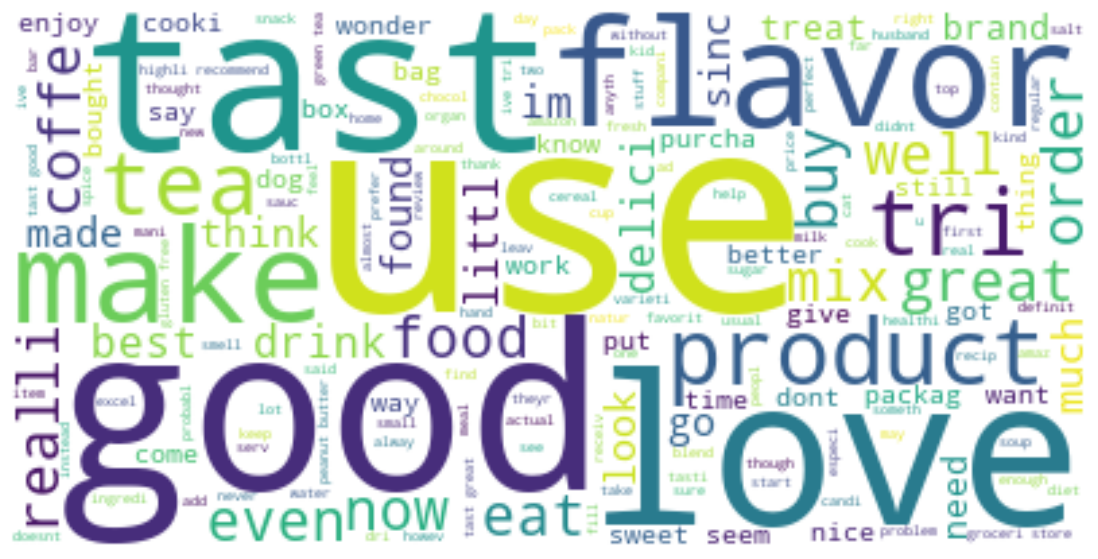

In [53]:
pos = df.loc[df.target=="Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

Word cloud for Negative reviews

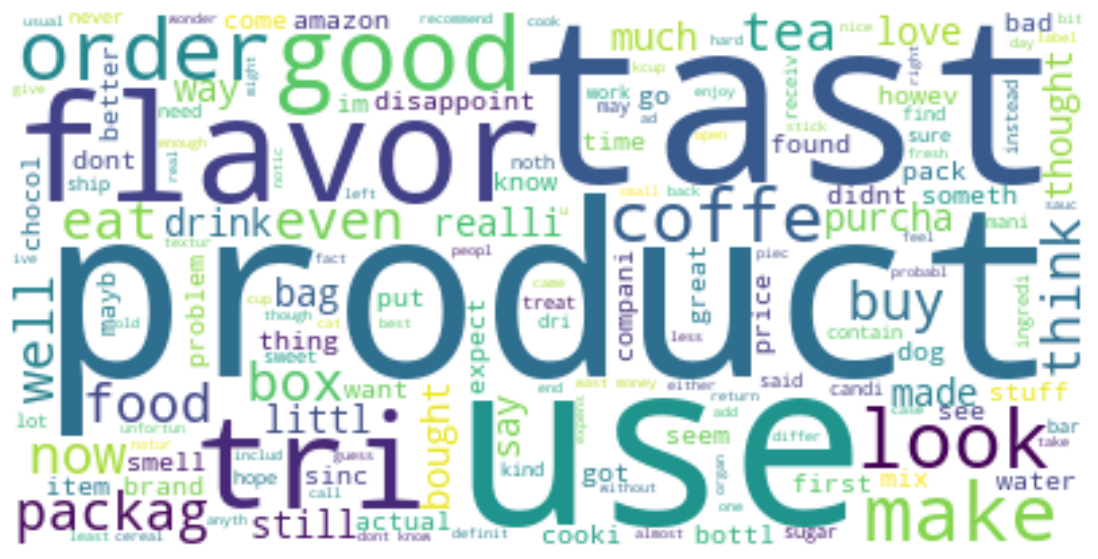

In [54]:
pos = df.loc[df.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

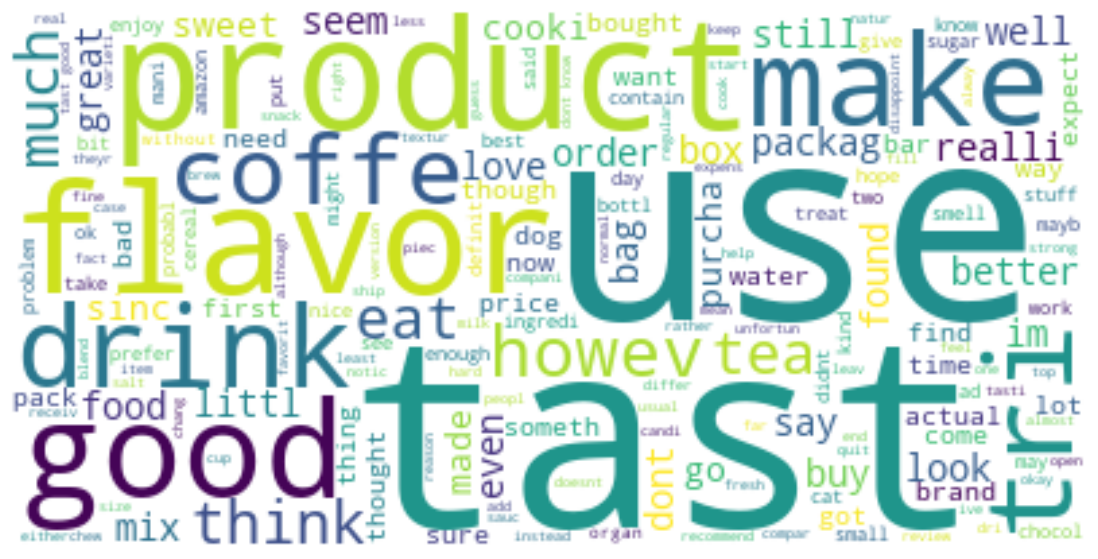

In [55]:
pos = df.loc[df.target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

Most common word

In [56]:
spam_corpus = []
for msg in df[df['target'] == 'Positive']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
spam_corpus

['dont',
 'use',
 'lot',
 'commerci',
 'babi',
 'food',
 'tend',
 'make',
 'feed',
 'grandchildren',
 'howev',
 'time',
 'want',
 'prepar',
 'someth',
 'quick',
 'fit',
 'scenerio',
 'babi',
 'need',
 'food',
 'now',
 'welloth',
 'review',
 'comment',
 'ingredi',
 'nutrit',
 'valu',
 'etc',
 'wont',
 'go',
 'like',
 'babi',
 'gourmet',
 'juici',
 'pear',
 'garden',
 'green',
 'onthego',
 'abil',
 'keep',
 'diaper',
 'bag',
 'pack',
 'car',
 'time',
 'well',
 'diaper',
 'bag',
 'take',
 'place',
 'product',
 'along',
 'sever',
 'other',
 'yogurt',
 'snack',
 'babi',
 'cooki',
 'jar',
 'etc',
 'come',
 'handi',
 'somewher',
 'longer',
 'expect',
 'go',
 'picnic',
 'park',
 'somewher',
 'doesnt',
 'offer',
 'babyfriendli',
 'foodsyou',
 'know',
 'no',
 'appl',
 'juic',
 'mac',
 'chees',
 'contain',
 'heavi',
 'duti',
 'noth',
 'punctur',
 'yet',
 'squirt',
 'well',
 'small',
 'bowl',
 'babi',
 'like',
 'iti',
 'would',
 'recommend',
 'product',
 'anyon',
 'busi',
 'onthego',
 'mom',
 'dad

In [58]:
len(spam_corpus)

1934787

In [59]:
from collections import Counter

Counter(spam_corpus)

Counter({'not': 23202,
         'like': 22681,
         'tast': 20501,
         'good': 17900,
         'love': 17403,
         'flavor': 17288,
         'use': 16761,
         'great': 16567,
         'product': 14460,
         'tri': 13627,
         'tea': 13412,
         'coffe': 12372,
         'make': 12020,
         'get': 11578,
         'food': 10085,
         'would': 8982,
         'time': 8615,
         'buy': 8577,
         'no': 8469,
         'realli': 8467,
         'eat': 8382,
         'price': 7722,
         'find': 7643,
         'much': 7588,
         'order': 7562,
         'also': 7501,
         'best': 7493,
         'dont': 7413,
         'littl': 7398,
         'amazon': 7285,
         'dog': 6725,
         'well': 6662,
         'drink': 6617,
         'store': 6549,
         'bag': 6515,
         'ive': 6273,
         'im': 6018,
         'even': 5967,
         'better': 5827,
         'mix': 5815,
         'chocol': 5697,
         'go': 5688,
         'now':

In [60]:
Counter(spam_corpus).most_common(30)

[('not', 23202),
 ('like', 22681),
 ('tast', 20501),
 ('good', 17900),
 ('love', 17403),
 ('flavor', 17288),
 ('use', 16761),
 ('great', 16567),
 ('product', 14460),
 ('tri', 13627),
 ('tea', 13412),
 ('coffe', 12372),
 ('make', 12020),
 ('get', 11578),
 ('food', 10085),
 ('would', 8982),
 ('time', 8615),
 ('buy', 8577),
 ('no', 8469),
 ('realli', 8467),
 ('eat', 8382),
 ('price', 7722),
 ('find', 7643),
 ('much', 7588),
 ('order', 7562),
 ('also', 7501),
 ('best', 7493),
 ('dont', 7413),
 ('littl', 7398),
 ('amazon', 7285)]

In [61]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,not,23202
1,like,22681
2,tast,20501
3,good,17900
4,love,17403
5,flavor,17288
6,use,16761
7,great,16567
8,product,14460
9,tri,13627


In [62]:
spam_corpus = []
for msg in df[df['target'] == 'Negative']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
spam_corpus

['bene',
 'not',
 'new',
 'brand',
 'dog',
 'food',
 'purina',
 'whole',
 'letspretendtoeathealthi',
 'fad',
 'peopl',
 'want',
 'seem',
 'like',
 'theyr',
 'thing',
 'petswhil',
 'front',
 'bag',
 'advertis',
 'whole',
 'grain',
 'veget',
 'vitamin',
 'real',
 'beef',
 'closer',
 'look',
 'ingredi',
 'list',
 'back',
 'packag',
 'list',
 'nasti',
 'stuff',
 'realli',
 'pretendhealthi',
 'food',
 'starter',
 'first',
 'three',
 'ingredi',
 'list',
 'back',
 'ground',
 'yellow',
 'corn',
 'chicken',
 'product',
 'meal',
 'corn',
 'gluten',
 'meal',
 'ingredi',
 'hardtodigest',
 'filler',
 'make',
 'dog',
 'feel',
 'full',
 'chemic',
 'boost',
 'protein',
 'count',
 'rememb',
 'reason',
 'behind',
 'melanin',
 'poison',
 'year',
 'back',
 'offer',
 'littl',
 'no',
 'real',
 'nutrient',
 'go',
 'list',
 'ingredi',
 'nonspecifi',
 'sourc',
 'meat',
 'bone',
 'meal',
 'food',
 'colour',
 'wheat',
 'gluten',
 'even',
 'propelyn',
 'glycol',
 'indepth',
 'analysi',
 'ingredi',
 'real',
 'purp

In [64]:
len(spam_corpus)

2154491

In [65]:
Counter(spam_corpus)

Counter({'not': 47047,
         'tast': 29623,
         'like': 28038,
         'product': 24092,
         'flavor': 16522,
         'would': 15670,
         'tri': 15346,
         'use': 13165,
         'good': 12878,
         'coffe': 12441,
         'no': 12241,
         'get': 12003,
         'buy': 11956,
         'order': 11106,
         'food': 10921,
         'dont': 10181,
         'tea': 9770,
         'even': 9598,
         'box': 9297,
         'make': 8566,
         'bag': 8452,
         'time': 8407,
         'eat': 8244,
         'much': 8161,
         'amazon': 8126,
         'realli': 8113,
         'look': 7759,
         'dog': 7518,
         'love': 7409,
         'packag': 7251,
         'review': 7124,
         'purchas': 7042,
         'im': 6676,
         'bought': 6587,
         'go': 6428,
         'first': 6413,
         'disappoint': 6268,
         'want': 6200,
         'better': 6110,
         'think': 5977,
         'bad': 5946,
         'water': 5895,
   

In [66]:
Counter(spam_corpus).most_common(30)

[('not', 47047),
 ('tast', 29623),
 ('like', 28038),
 ('product', 24092),
 ('flavor', 16522),
 ('would', 15670),
 ('tri', 15346),
 ('use', 13165),
 ('good', 12878),
 ('coffe', 12441),
 ('no', 12241),
 ('get', 12003),
 ('buy', 11956),
 ('order', 11106),
 ('food', 10921),
 ('dont', 10181),
 ('tea', 9770),
 ('even', 9598),
 ('box', 9297),
 ('make', 8566),
 ('bag', 8452),
 ('time', 8407),
 ('eat', 8244),
 ('much', 8161),
 ('amazon', 8126),
 ('realli', 8113),
 ('look', 7759),
 ('dog', 7518),
 ('love', 7409),
 ('packag', 7251)]

In [67]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,not,47047
1,tast,29623
2,like,28038
3,product,24092
4,flavor,16522
5,would,15670
6,tri,15346
7,use,13165
8,good,12878
9,coffe,12441


In [68]:
spam_corpus = []
for msg in df[df['target'] == 'Neutral']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
spam_corpus

['seem',
 'littl',
 'wholesom',
 'supermarket',
 'brand',
 'somewhat',
 'mushi',
 'doesnt',
 'quit',
 'much',
 'flavor',
 'either',
 'didnt',
 'pass',
 'muster',
 'kid',
 'probabl',
 'wont',
 'buy',
 'flavor',
 'good',
 'howev',
 'not',
 'see',
 'differc',
 'oaker',
 'oat',
 'brand',
 'mushi',
 'stuff',
 'buy',
 'big',
 'box',
 'store',
 'noth',
 'healthi',
 'carb',
 'sugar',
 'save',
 'money',
 'get',
 'someth',
 'least',
 'tast',
 'use',
 'spici',
 'food',
 'south',
 'texa',
 'not',
 'spici',
 'doubt',
 'much',
 'habanero',
 'use',
 'could',
 'take',
 'notch',
 'two',
 'watch',
 'price',
 'assort',
 'good',
 'get',
 'gold',
 'box',
 'purchas',
 'price',
 'less',
 'target',
 'your',
 'impuls',
 'like',
 'ok',
 'dont',
 'get',
 'wrong',
 'qualiti',
 'babi',
 'good',
 'no',
 'complaint',
 'retrospect',
 'price',
 'littl',
 'ridicul',
 'esp',
 'add',
 'ship',
 'tast',
 'great',
 'berri',
 'melt',
 'may',
 'order',
 'winter',
 'order',
 'cold',
 'weather',
 'enjoy',
 'flavor',
 'dog',
 'l

In [70]:
len(spam_corpus)

1443013

In [71]:
from collections import Counter

Counter(spam_corpus)

Counter({'not': 29760,
         'like': 20639,
         'tast': 19671,
         'flavor': 15534,
         'good': 12995,
         'product': 11947,
         'would': 10860,
         'use': 10415,
         'coffe': 10030,
         'tri': 9495,
         'get': 8774,
         'tea': 7951,
         'much': 7278,
         'realli': 6980,
         'dont': 6916,
         'make': 6668,
         'buy': 6209,
         'food': 6050,
         'drink': 5824,
         'no': 5810,
         'littl': 5785,
         'love': 5717,
         'better': 5567,
         'time': 5411,
         'eat': 5220,
         'im': 5202,
         'great': 5094,
         'think': 5028,
         'price': 5004,
         'box': 4972,
         'order': 4836,
         'bag': 4782,
         'dog': 4627,
         'packag': 4607,
         'water': 4567,
         'chocol': 4555,
         'also': 4511,
         'look': 4487,
         'bit': 4377,
         'sweet': 4239,
         'go': 4237,
         'want': 4224,
         'sugar': 4

In [72]:
Counter(spam_corpus).most_common(30)

[('not', 29760),
 ('like', 20639),
 ('tast', 19671),
 ('flavor', 15534),
 ('good', 12995),
 ('product', 11947),
 ('would', 10860),
 ('use', 10415),
 ('coffe', 10030),
 ('tri', 9495),
 ('get', 8774),
 ('tea', 7951),
 ('much', 7278),
 ('realli', 6980),
 ('dont', 6916),
 ('make', 6668),
 ('buy', 6209),
 ('food', 6050),
 ('drink', 5824),
 ('no', 5810),
 ('littl', 5785),
 ('love', 5717),
 ('better', 5567),
 ('time', 5411),
 ('eat', 5220),
 ('im', 5202),
 ('great', 5094),
 ('think', 5028),
 ('price', 5004),
 ('box', 4972)]

In [73]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,not,29760
1,like,20639
2,tast,19671
3,flavor,15534
4,good,12995
5,product,11947
6,would,10860
7,use,10415
8,coffe,10030
9,tri,9495


In [74]:
X = df.Text
y = df.target

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(X)
X

<129770x127979 sparse matrix of type '<class 'numpy.int64'>'
	with 4491041 stored elements in Compressed Sparse Row format>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [77]:
X_train.shape, X_test.shape

((103816, 127979), (25954, 127979))

<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">4. Vectorization</h2>

Bag of Words Vectorizer

In [78]:
# bow_vectorizer = CountVectorizer(max_features=10000)
# bow_vectorizer.fit(X_train).toarray()

In [79]:
# transform
# bow_x_train = bow_vectorizer.fit_transform(X_train)
# bow_x_test = bow_vectorizer.transform(X_test)

TF-IDF Vectorizer

In [80]:
# tfidf_vectorizer = TfidfVectorizer(max_features=10000)
# tfidf_vectorizer.fit(X_train).toarray()

In [81]:
# tfidf_x_train = tfidf_vectorizer.fit_transform(X_train)
# tfidf_x_test = tfidf_vectorizer.transform(X_test)

Label Encoding

In [82]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [83]:
labels = label_encoder.classes_.tolist()

In [84]:
labels

['Negative', 'Neutral', 'Positive']

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">5. Model Evaluation</h2>

In [85]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score

In [86]:
mnb = MultinomialNB()

For bow

In [87]:
model = mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

In [88]:
print('accuracy_score:...',accuracy_score(y_test,y_pred))
print('confusion_matrix:...',confusion_matrix(y_test,y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='weighted'))

accuracy_score:... 0.6914541111196733
confusion_matrix:... [[7434 1579  987]
 [2037 2539 1378]
 [1083  944 7973]]
precision_score: 0.683613626353792


For tfidf

In [89]:
# mnb.fit(tfidf_x_train, y_train)

# y_pred = mnb.predict(tfidf_x_test)

In [90]:
# print('accuracy_score:...',accuracy_score(y_test,y_pred))
# print('confusion_matrix:...',confusion_matrix(y_test,y_pred))
# print('precision_score:', precision_score(y_test, y_pred, average='weighted'))

Confusion Matrix

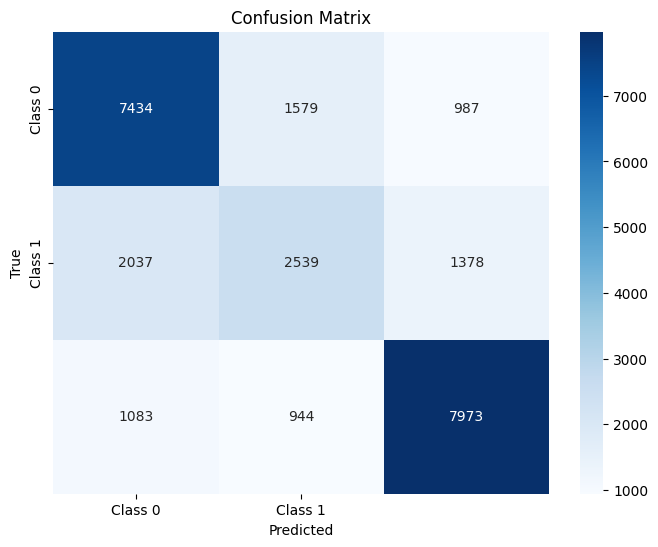

In [91]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">6. Deployment</h2>

In [92]:
import pickle

pickle.dump(cv,open('../models/bow.pkl','wb'))
pickle.dump(model,open('../models/model.pkl','wb'))